In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("CurrentPopulationSurvey.csv")
df.columns = df.columns.str.lower()
df.head()

,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,lehs
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1


In [2]:
df.shape

(344287, 234)

In [3]:
selected_df = df[['year','age', 'sex', 'race','region','educ99','marst','occ1990','ind1990','annhrs','incwage','metro', 'classwkr', 'wkswork1','white', 'black', 'othrace', 'hispan', 'nativity','ft','uhrswork','bpl']]

In [8]:
(selected_df['incwage'] == 0).sum()

0

In [4]:
selected_df['year'].value_counts()

year
2007    56467
2009    55617
2011    53857
2013    53790
1990    45033
1981    42379
1999    37144
Name: count, dtype: int64

In [9]:
selected_df.isna().sum()

year            0
age             0
sex             0
race            0
region          0
educ99      87412
marst           0
occ1990         0
ind1990       181
annhrs          0
incwage         0
metro        9759
classwkr        0
wkswork1        0
white           0
black           0
othrace         0
hispan       1397
nativity    87824
ft              0
uhrswork        0
bpl         87681
dtype: int64

In [5]:
selected_df.dropna(subset=['educ99'], inplace=True)


C:\Users\Tijl WIjnen\AppData\Local\Temp\ipykernel_19044\726148371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(subset=['educ99'], inplace=True)


In [6]:
selected_df.isna().sum()

year           0
age            0
sex            0
race           0
region         0
educ99         0
marst          0
occ1990        0
ind1990      181
annhrs         0
incwage        0
metro       1973
classwkr       0
wkswork1       0
white          0
black          0
othrace        0
hispan       260
nativity     412
ft             0
uhrswork       0
bpl          269
dtype: int64

In [ ]:
#Missing values in the dataset
zero_wages_count = (selected_df['incwage'] == 0).sum()
zero_occ1990_count = (selected_df['occ1990'] == 999).sum()
print("Number of occurrences of 0 in incwage:", zero_wages_count)
print("Number of occurrences of 999 in occ1990:", zero_occ1990_count)
#deleting these values?
print("Median of incwage at the moment:", selected_df['incwage'].mean())

zero_counts = (selected_df == 0).sum()
print("Number of zero occurrences in each column:")
print(zero_counts)

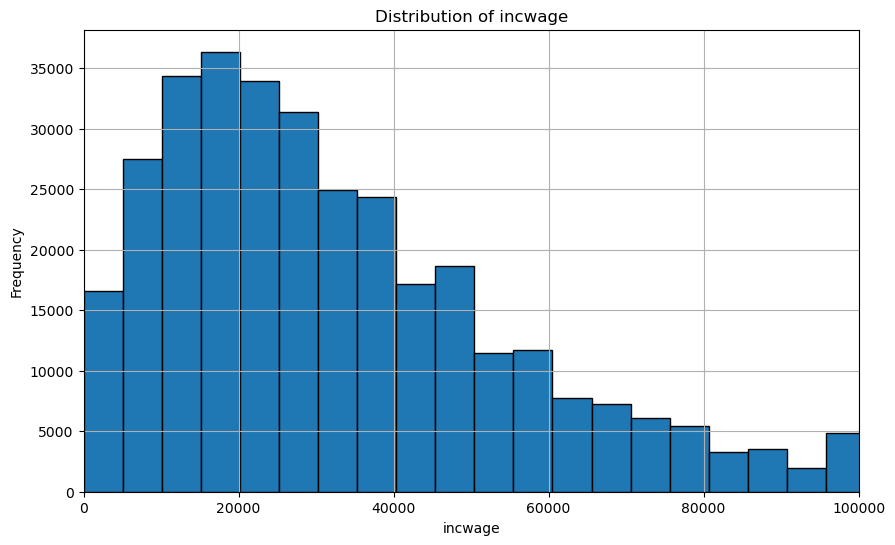

In [10]:

plt.figure(figsize=(10, 6))
plt.hist(selected_df['incwage'], bins=250, edgecolor='black')
plt.title('Distribution of incwage')
plt.xlabel('incwage')
plt.xlim(0, 100000)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


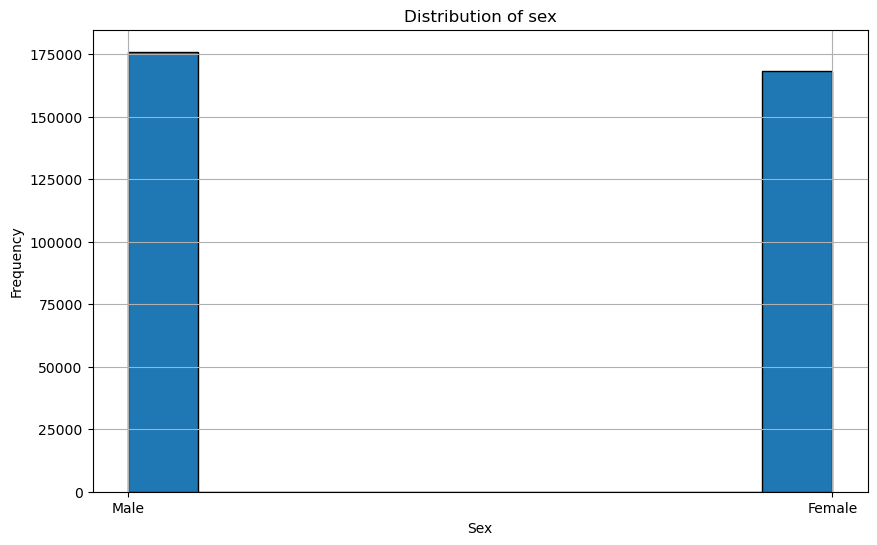

1    175911
2    168376
Name: sex, dtype: int64

In [37]:
#Distribution of gender
plt.figure(figsize=(10, 6))
plt.hist(selected_df['sex'] ,edgecolor='black')
plt.title('Distribution of sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks([1, 2], ['Male', 'Female'])
plt.grid(True)
plt.show()
selected_df['sex'].value_counts()

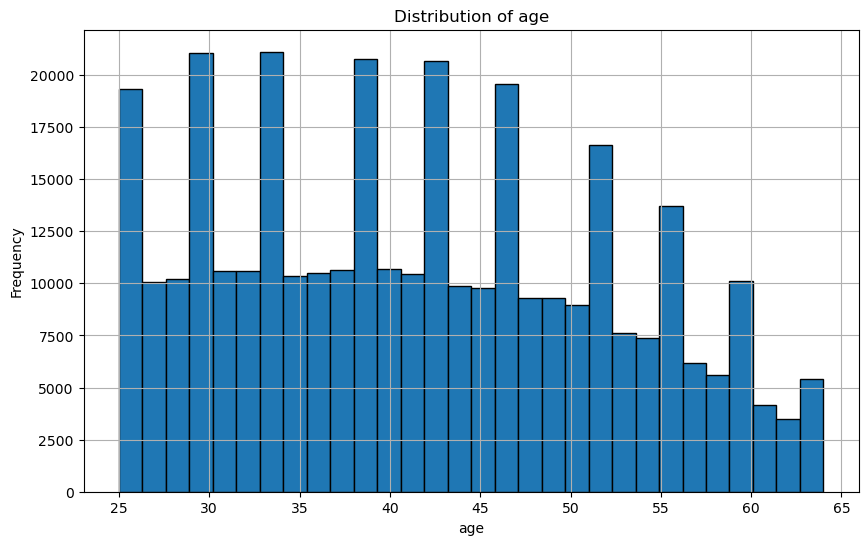

[1990 2009 1981 1999 2007 2011 2013]


In [38]:
#Distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(selected_df['age'], bins = 30,edgecolor='black')
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(selected_df['year'].unique())

In [ ]:
selected_df.isna().sum()
print(selected_df.shape)

In [39]:
#Based on this occ1990 linke -->https://cps.ipums.org/cps-action/variables/OCC1990#description_section
occupation_mapping = {
    'Managerial and Professional': (range(3, 201), 1),
    'Technical, Sales, and Administrative': (range(201, 401), 2),
    'Service': (range(401, 471), 3),
    'Farming, Forestry, and Fishing': (range(471, 501), 4),
    'Precision Production, Craft, and Repairers': (range(501, 701), 5),
    'Operatives and Laborers': (range(701, 901), 6),
    'Non-occupational responses': (range(901, 1000), 7)
}

def map_occupation(occ_code):
    for category, (code_range, occupation_code) in occupation_mapping.items():
        if occ_code in code_range:
            return occupation_code
    return None

selected_df['occupation_category_1990'] = selected_df['occ1990'].apply(map_occupation)

C:\Users\Tijl WIjnen\AppData\Local\Temp\ipykernel_64796\108309086.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['occupation_category_1990'] = selected_df['occ1990'].apply(map_occupation)


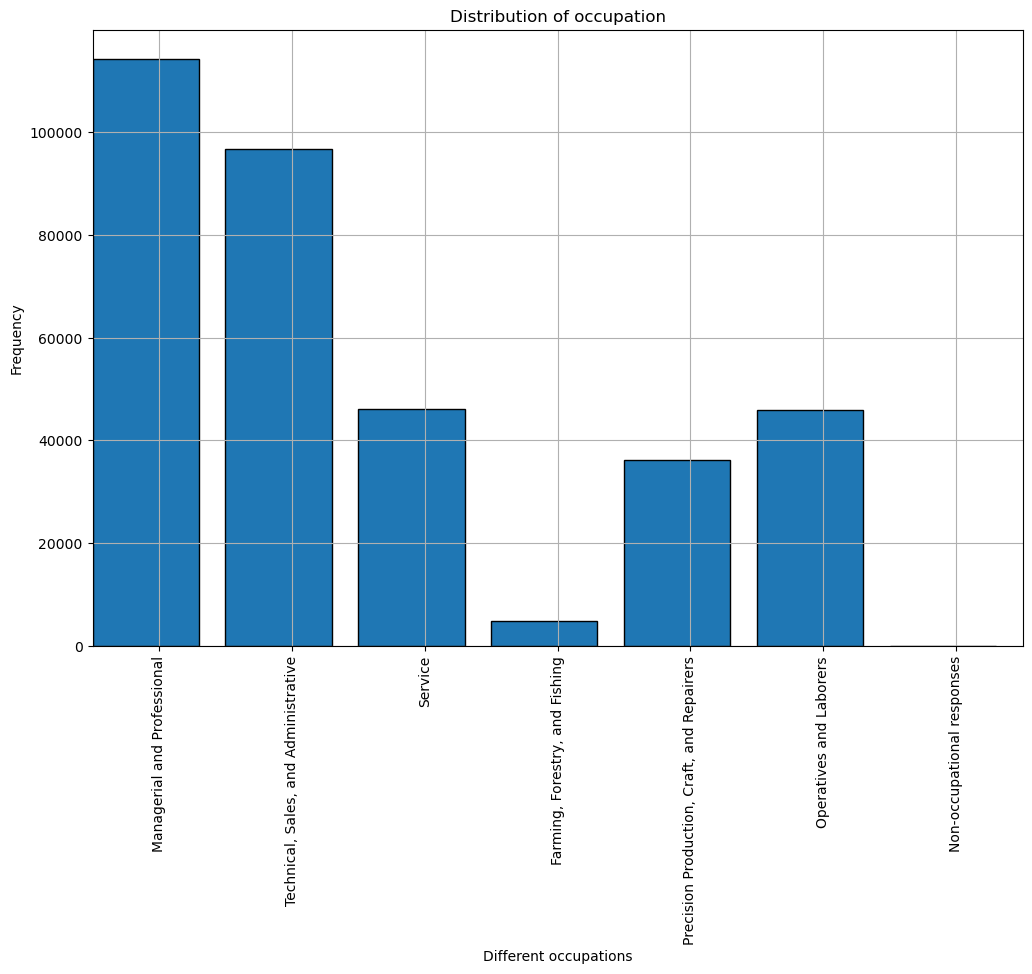

In [40]:
bin_edges = [i - 0.5 for i in range(1, 9)] 

occupation_labels = [
    'Managerial and Professional',
    'Technical, Sales, and Administrative',
    'Service',
    'Farming, Forestry, and Fishing',
    'Precision Production, Craft, and Repairers',
    'Operatives and Laborers',
    'Non-occupational responses'
]

plt.figure(figsize=(12, 8))
plt.hist(selected_df['occupation_category_1990'], bins=bin_edges, edgecolor='black', width = 0.8)
plt.title('Distribution of occupation')
plt.xlabel('Different occupations')
plt.ylabel('Frequency')
plt.xticks(range(1, 8), occupation_labels, rotation='vertical')
plt.xlim(0.5, 7.5)
plt.grid(True)
plt.show()


In [ ]:
occupation_mapping = {
    'Managerial and Professional': (range(3, 201), 1),
    'Technical, Sales, and Administrative': (range(201, 401), 2),
    'Service': (range(401, 471), 3),
    'Farming, Forestry, and Fishing': (range(471, 501), 4),
    'Precision Production, Craft, and Repairers': (range(501, 701), 5),
    'Operatives and Laborers': (range(701, 901), 6),
    'Non-occupational responses': (range(901, 1000), 7)
}

# Function to map occupation codes to categories
def map_occupation(occ_code):
    for category, (code_range, occupation_code) in occupation_mapping.items():
        if occ_code in code_range:
            return occupation_code
    return None

selected_df['occupation_category_1990'] = selected_df['occ1990'].apply(map_occupation)

occupation_names = {
    1: 'Managerial',
    2: 'Technical, Sales, and Administrative',
    3: 'Service',
    4: 'Farming, Forestry, and Fishing',
    5: 'Precision Production, Craft, and Repairers',
    6: 'Operatives and Laborers',
    7: 'Non-occupational responses'
}

selected_df['occupation_category_name'] = selected_df['occupation_category_1990'].map(occupation_names)

occupation_dummies = pd.get_dummies(selected_df['occupation_category_name'])

selected_df = pd.concat([selected_df, occupation_dummies], axis=1)

selected_df['occupation_category_1990'].head()

In [ ]:

selected_df = selected_df.dropna(subset=['ind1990'])

industry_mapping = {
    'Agriculture, forestry, and fisheries': (range(10, 33), 1),
    'Mining': (range(40, 51), 2),
    'Construction': (range(60, 61), 3),
    'Manufacturing': (range(100, 393), 4),
    'Transportation': (range(400, 473), 5),
    'Wholesale trade': (range(500, 572), 6),
    'Retail trade': (range(580, 692), 7),
    'Finance': (range(700, 713), 8),
    'Business and repair services': (range(721, 761), 9),
    'Personal services': (range(761, 792), 10),
    'Entertainment': (range(800, 811), 11),
    'Professional and related services': (range(812, 894), 12),
    'Public administration': (range(900, 933), 13),
    'Active duty military': (range(940, 961), 14)
}

def map_industry(ind_code):
    for category, (code_range, industry_code) in industry_mapping.items():
        if ind_code in code_range:
            return industry_code
    return None

selected_df['industry_category_1990'] = selected_df['ind1990'].apply(map_industry)

industry_names = {
    1: 'Agriculture, forestry, and fisheries',
    2: 'Mining',
    3: 'Construction',
    4: 'Manufacturing',
    5: 'Transportation',
    6: 'Wholesale trade',
    7: 'Retail trade',
    8: 'Finance',
    9: 'Business and repair services',
    10: 'Personal services',
    11: 'Entertainment',
    12: 'Professional and related services',
    13: 'Public administration',
    14: 'Active duty military'
}

selected_df['industry_category_name'] = selected_df['industry_category_1990'].map(industry_names)

industry_dummies = pd.get_dummies(selected_df['industry_category_name'])

selected_df = pd.concat([selected_df, industry_dummies], axis=1)


In [ ]:
selected_df['industry_category_1990'].value_counts()

In [ ]:
xtick_positions = range(1, 15)
xtick_labels = [
    'Agriculture, Forestry, and Fisheries (1)',
    'Mining (2)',
    'Construction(3)',
    'Manufacturing(4)',
    'Transportation and Communications(5)',
    'Wholesale Trade(6)',
    'Retail Trade(7)',
    'Finance(8)',
    'Business and Repair Services(9)',
    'Personal Services(10)',
    'Entertainment(11)',
    'Professional Services(12)',
    'Public Administration(13)',
    'Active Duty Military(14)'
]

bin_midpoints = [(start + end) / 2 for start, end in zip(range(1, 15), range(2, 16))]

plt.figure(figsize=(12, 10))
plt.hist(selected_df['industry_category_1990'], bins=range(1, 16), edgecolor='black')
plt.title('Distribution of Industries')
plt.ylabel('Frequency')
plt.xticks(bin_midpoints, xtick_labels, rotation='vertical')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

educ_mapping_combined = {
    1: 'No school',
    4: 'Elementary School',
    5: 'Elementary/Middle School',
    6: 'Elementary/Middle School',
    7: 'Elementary/Middle School',
    8: 'Elementary/Middle School',
    9: 'Elementary/Middle School',
    10: 'High School',
    11: 'Some college',
    13: "Associate's degree",
    14: "Associate's degree",
    15: "Bachelor's degree",
    16: "Master's/Professional degree",
    17: "Master's/Professional degree",
    18: 'Doctorate degree'
}


In [ ]:

selected_df['educ99_lbl'] = selected_df['educ99'].fillna(10) 

selected_df['educ99_lbl_combined'] = selected_df['educ99_lbl'].map(educ_mapping_combined)

print(selected_df['educ99_lbl_combined'].value_counts())


In [ ]:
educ_dummies = pd.get_dummies(selected_df['educ99_lbl_combined'])
selected_df = pd.concat([selected_df, educ_dummies], axis=1)

In [ ]:
print(selected_df['sex'].value_counts())


In [ ]:

sex_mapping = {
    1: 'Male',
    2: 'Female'
}

selected_df['sex_lbl'] = selected_df['sex'].map(sex_mapping)

sex_dummies = pd.get_dummies(selected_df['sex_lbl'])

selected_df = pd.concat([selected_df, sex_dummies], axis=1)


In [ ]:
selected_df.isna().sum()

In [ ]:

region_mapping = {
    11: 'North_East',
    12: 'North_East',
    21: 'Mid_west',
    22: 'Mid_west',
    31: 'South',
    32: 'South',
    33: 'South',
    41: 'West',
    42: 'West'
}

selected_df['region_lbl'] = selected_df['region'].map(region_mapping)

region_dummies = pd.get_dummies(selected_df['region_lbl'])

selected_df = pd.concat([selected_df, region_dummies], axis=1)


In [ ]:

marst_mapping = {
    1: 'Married_spouse present',
    2: 'Married_spouse absent',
    3: 'Separated',
    4: 'Divorced',
    5: 'Widowed',
    6: 'Never_married_single',
}

selected_df['marst_lbl'] = selected_df['marst'].map(marst_mapping)

marst_dummies = pd.get_dummies(selected_df['marst_lbl'])

selected_df = pd.concat([selected_df, marst_dummies], axis=1)


In [ ]:
selected_df.dropna(subset=['metro'], inplace=True)
selected_df['metro'].unique()

In [ ]:

metro_mapping = {
    1: 'not_metro',
    2: 'metro_area',
    3: 'metro_area',
    4: 'metro_area'
}

selected_df['metro_lbl'] = selected_df['metro'].map(metro_mapping)

metro_dummies = pd.get_dummies(selected_df['metro_lbl'])

selected_df = pd.concat([selected_df, metro_dummies], axis=1)


In [ ]:
median_nativity = selected_df['nativity'].median()

selected_df['nativity'].fillna(median_nativity, inplace=True)

print(selected_df['nativity'].sum())


In [ ]:
nativity_mapping = {
    1: 'nat_both_parents',
    2: 'nat_mother_foreign',
    3: 'nat_father_foreign',
    4: 'nat_both_foreign',
    5: 'nat_foreign_born'
}

selected_df['nativity_lbl'] = selected_df['nativity'].map(nativity_mapping)

nativity_dummies = pd.get_dummies(selected_df['nativity_lbl'])

selected_df = pd.concat([selected_df, nativity_dummies], axis=1)


In [ ]:

classwkr_mapping = {
    10: 'Self-empl',
    21: 'Wage/salary_private sector',
    24: 'Wage/salary_government',
    25: 'Federal_govt employee',
    27: 'State_govt',
    28: 'Local_govt',
    29: 'Unpaid_family'
}

selected_df['classwkr_lbl'] = selected_df['classwkr'].map(classwkr_mapping)

classwkr_dummies = pd.get_dummies(selected_df['classwkr_lbl'])

selected_df = pd.concat([selected_df, classwkr_dummies], axis=1)

In [ ]:
selected_df.info()

In [ ]:
# Fill missing values in 'bpl' column with median
median_bpl = selected_df['bpl'].median()
selected_df['bpl'] = selected_df['bpl'].fillna(median_bpl)

# Define continent ranges
continent_ranges = {
    'United_states_bpl': (range(9900, 9901), 1),
    'United_states_outlying_bpl': (range(10000, 12091), 2),
    'North_america_bpl': (range(15000, 19901), 3),
    'Central_america_bpl': (range(20000, 21091), 4),
    'Caribbean_bpl': (range(25000, 26092), 5),
    'South_america_bpl': (range(30005, 31001), 6),
    'Europe_bpl': (range(40000, 49901), 7),
    'Asia_bpl': (range(50000, 59901), 8),
    'Africa_bpl': (range(60010, 60100), 9),
    'Oceania_bpl': (range(70010, 72001), 10)
}

def map_continent(cont_code):
    for category, (code_range, continent_code) in continent_ranges.items():
        if cont_code in code_range:
            return continent_code 
    return None

selected_df['bpl_category'] = selected_df['bpl'].apply(map_continent)

continent_ranges = {
    1: 'United_states_bpl',
    2: 'United_states_outlying_bpl',
    3: 'North_america_bpl',
    4: 'Central_america_bpl',
    5: 'Caribbean_bpl',
    6: 'South_america_bpl',
    7: 'Europe_bpl',
    8: 'Asia_bpl',
    9: 'Africa_bpl',
    10: 'Oceania_bpl'
}
selected_df['bpl_category_lbl'] = selected_df['bpl_category'].map(continent_ranges)
bpl_dummies = pd.get_dummies(selected_df['bpl_category_lbl'])

# Concatenate the dummy variables with the original DataFrame
selected_df = pd.concat([selected_df, bpl_dummies], axis=1)
selected_df['bpl_category'].head()

In [ ]:
selected_df.info()
print(selected_df.isna().sum())
print(selected_df.shape)
selected_df['bpl_category'].head()

In [ ]:
df.year.unique()

In [ ]:
# Given CPI values for the years
#https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-
cpi_values = {
    1990: 130.7, 2009: 214.5, 1981: 90.9, 1999: 166.6, 2007: 207.3,
    2011: 224.9, 2013: 233.0, 2023: 304.7
}

# Function to adjust income wages for inflation to 2023
def adjust_income_wages(incwage, year):
    if year == 2023:
        return incwage
    else:
        cpi_ratio = cpi_values[2023] / cpi_values[year]
        return incwage * cpi_ratio

selected_df['incWage_2023_inflated'] = selected_df.apply(lambda row: adjust_income_wages(row['incwage'], row['year']), axis=1)
selected_df['incWage_2023_inflated'].head()

In [ ]:
# Check for missing values in each column
columns_with_missing_values = selected_df.isna().sum()
columns_with_missing_values_above_zero = columns_with_missing_values[columns_with_missing_values > 0]
print(columns_with_missing_values_above_zero)


In [ ]:
# Remove rows with missing values in the "hispan" column
selected_df = selected_df.dropna(subset=["hispan"])

# Verify if there are any missing values left
print(selected_df.isna().sum())

In [ ]:
for column in selected_df.columns:
    print(column)

In [ ]:
selected_df.to_csv('Finished_CPS_selected_df_columns.csv', index = False)

In [ ]:
#percentage of missing values for everything
#how does the features behave before and after imputation
#looking at the influence of median when imputing

In [43]:
df = pd.read_csv("CurrentPopulationSurvey.csv")

In [44]:
selected_df = df[['year','age', 'sex', 'race','region','educ99','marst','occ1990','ind1990','annhrs','incwage', 'hrwage','metro', 'classwkr', 'wkswork1','white', 'black', 'othrace', 'hispan', 'nativity','ft','uhrswork','bpl']]

In [45]:
selected_df.isnull().sum()

year            0
age             0
sex             0
race            0
region          0
educ99      87412
marst           0
occ1990         0
ind1990       181
annhrs          0
incwage         0
hrwage          0
metro        9759
classwkr        0
wkswork1        0
white           0
black           0
othrace         0
hispan       1397
nativity    87824
ft              0
uhrswork        0
bpl         87681
dtype: int64

In [46]:
#percentage of missing values 
(selected_df.isnull().sum().max() / selected_df.shape[0]) * 100
#25.5 Percent of maximum missiong values in whole selected_df

25.508950381513095

### Looking at the Distribution of Categories before and after Imputation

In [48]:
real_df = pd.read_csv("Finished_CPS_selected_df_columns.csv")
real_df_copy = real_df.copy()

In [ ]:

# Define continent ranges
continent_ranges = {
    'United_states_bpl': (range(9900, 9901), 1),
    'United_states_outlying_bpl': (range(10000, 12091), 2),
    'North_america_bpl': (range(15000, 19901), 3),
    'Central_america_bpl': (range(20000, 21091), 4),
    'Caribbean_bpl': (range(25000, 26092), 5),
    'South_america_bpl': (range(30005, 31001), 6),
    'Europe_bpl': (range(40000, 49901), 7),
    'Asia_bpl': (range(50000, 59901), 8),
    'Africa_bpl': (range(60010, 60100), 9),
    'Oceania_bpl': (range(70010, 72001), 10)
}

# Function to map continent codes to categories
def map_continent(cont_code):
    for category, (code_range, continent_code) in continent_ranges.items():
        if cont_code in code_range:
            return continent_code  
    return None

selected_df['bpl_category'] = selected_df['bpl'].apply(map_continent)

continent_ranges = {
    1: 'United_states_bpl',
    2: 'United_states_outlying_bpl',
    3: 'North_america_bpl',
    4: 'Central_america_bpl',
    5: 'Caribbean_bpl',
    6: 'South_america_bpl',
    7: 'Europe_bpl',
    8: 'Asia_bpl',
    9: 'Africa_bpl',
    10: 'Oceania_bpl'
}
selected_df['bpl_category_lbl'] = selected_df['bpl_category'].map(continent_ranges)

In [ ]:
real_df_copy['educ99_lbl'].head()

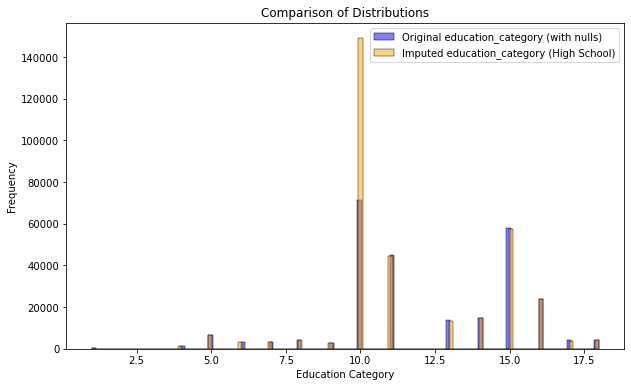

Summary Statistics for educ99 (with nulls):
count    256875.000000
mean         12.175689
std           3.003724
min           1.000000
25%          10.000000
50%          11.000000
75%          15.000000
max          18.000000
Name: educ99, dtype: float64

Summary Statistics for Imputed education_category:
count    333004.000000
mean         11.667454
std           2.784143
min           1.000000
25%          10.000000
50%          10.000000
75%          15.000000
max          18.000000
Name: educ99_lbl, dtype: float64


In [62]:
# Compare distributions
plt.figure(figsize=(10, 6))
sns.histplot(selected_df['educ99'], color='blue', alpha=0.5, label='Original education_category (with nulls)')
sns.histplot(real_df_copy['educ99_lbl'], color='orange', alpha=0.5, label='Imputed education_category (High School)')
plt.title('Comparison of Distributions')
plt.xlabel('Education Category')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Compare summary statistics
print("Summary Statistics for educ99 (with nulls):")
print(selected_df['educ99'].describe())
print("\nSummary Statistics for Imputed education_category:")
print(real_df_copy['educ99_lbl'].describe())


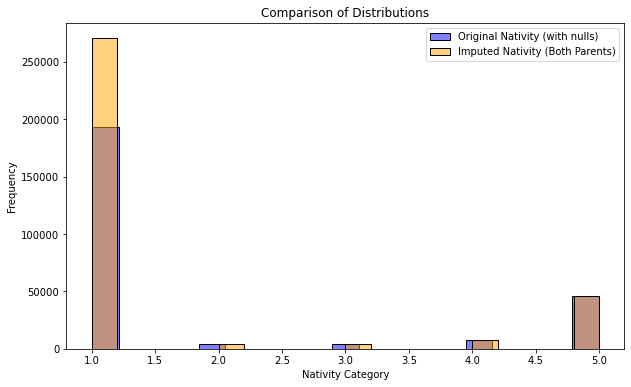

Summary Statistics for Nativity (with nulls):
count    256463.000000
mean          1.862893
std           1.578474
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: nativity, dtype: float64

Summary Statistics for Imputed nativity:
count    333004.000000
mean          1.660397
std           1.428489
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: nativity, dtype: float64


In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(selected_df['nativity'], color='blue', alpha=0.5, label='Original Nativity (with nulls)')
sns.histplot(real_df_copy['nativity'], color='orange', alpha=0.5, label='Imputed Nativity (Both Parents)')
plt.title('Comparison of Distributions')
plt.xlabel('Nativity Category')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Summary Statistics for Nativity (with nulls):")
print(selected_df['nativity'].describe())
print("\nSummary Statistics for Imputed nativity:")
print(real_df_copy['nativity'].describe())


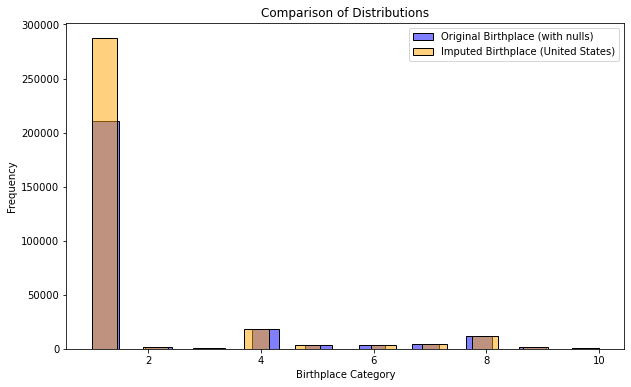

Summary Statistics for Birthplace (with nulls):
count    256606.000000
mean          1.840331
std           1.983484
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: bpl_category, dtype: float64

Summary Statistics for Birthplace nativity:
count    333004.000000
mean          1.644157
std           1.773608
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: bpl_category, dtype: float64


In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(selected_df['bpl_category'], color='blue', alpha=0.5, label='Original Birthplace (with nulls)')
sns.histplot(real_df_copy['bpl_category'], color='orange', alpha=0.5, label='Imputed Birthplace (United States)')
plt.title('Comparison of Distributions')
plt.xlabel('Birthplace Category')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Summary Statistics for Birthplace (with nulls):")
print(selected_df['bpl_category'].describe())
print("\nSummary Statistics for Birthplace nativity:")
print(real_df_copy['bpl_category'].describe())
